In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Intro to ML PR/Project/18100002-trimmed.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
data_info = {
    "First 5 Rows": data.head(),
    "Data Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Basic Statistics": data.describe(include='all', datetime_is_numeric=True)
}

data_info



{'First 5 Rows':   REF_DATE     GEO           DGUID                     Products      UOM  \
 0  1995-01  Canada  2016A000011124      Round steak, 1 kilogram  Dollars   
 1  1995-01  Canada  2016A000011124    Sirloin steak, 1 kilogram  Dollars   
 2  1995-01  Canada  2016A000011124  Prime rib roast, 1 kilogram  Dollars   
 3  1995-01  Canada  2016A000011124      Blade roast, 1 kilogram  Dollars   
 4  1995-01  Canada  2016A000011124     Stewing beef, 1 kilogram  Dollars   
 
    UOM_ID SCALAR_FACTOR  SCALAR_ID   VECTOR  COORDINATE  VALUE  STATUS  \
 0      81         units          0  v735165         1.1  10.17     NaN   
 1      81         units          0  v735176         1.2  11.25     NaN   
 2      81         units          0  v735187         1.3  12.08     NaN   
 3      81         units          0  v735198         1.4   7.23     NaN   
 4      81         units          0  v735209         1.5   7.12     NaN   
 
    SYMBOL TERMINATED  DECIMALS  
 0     NaN        NaN         2  


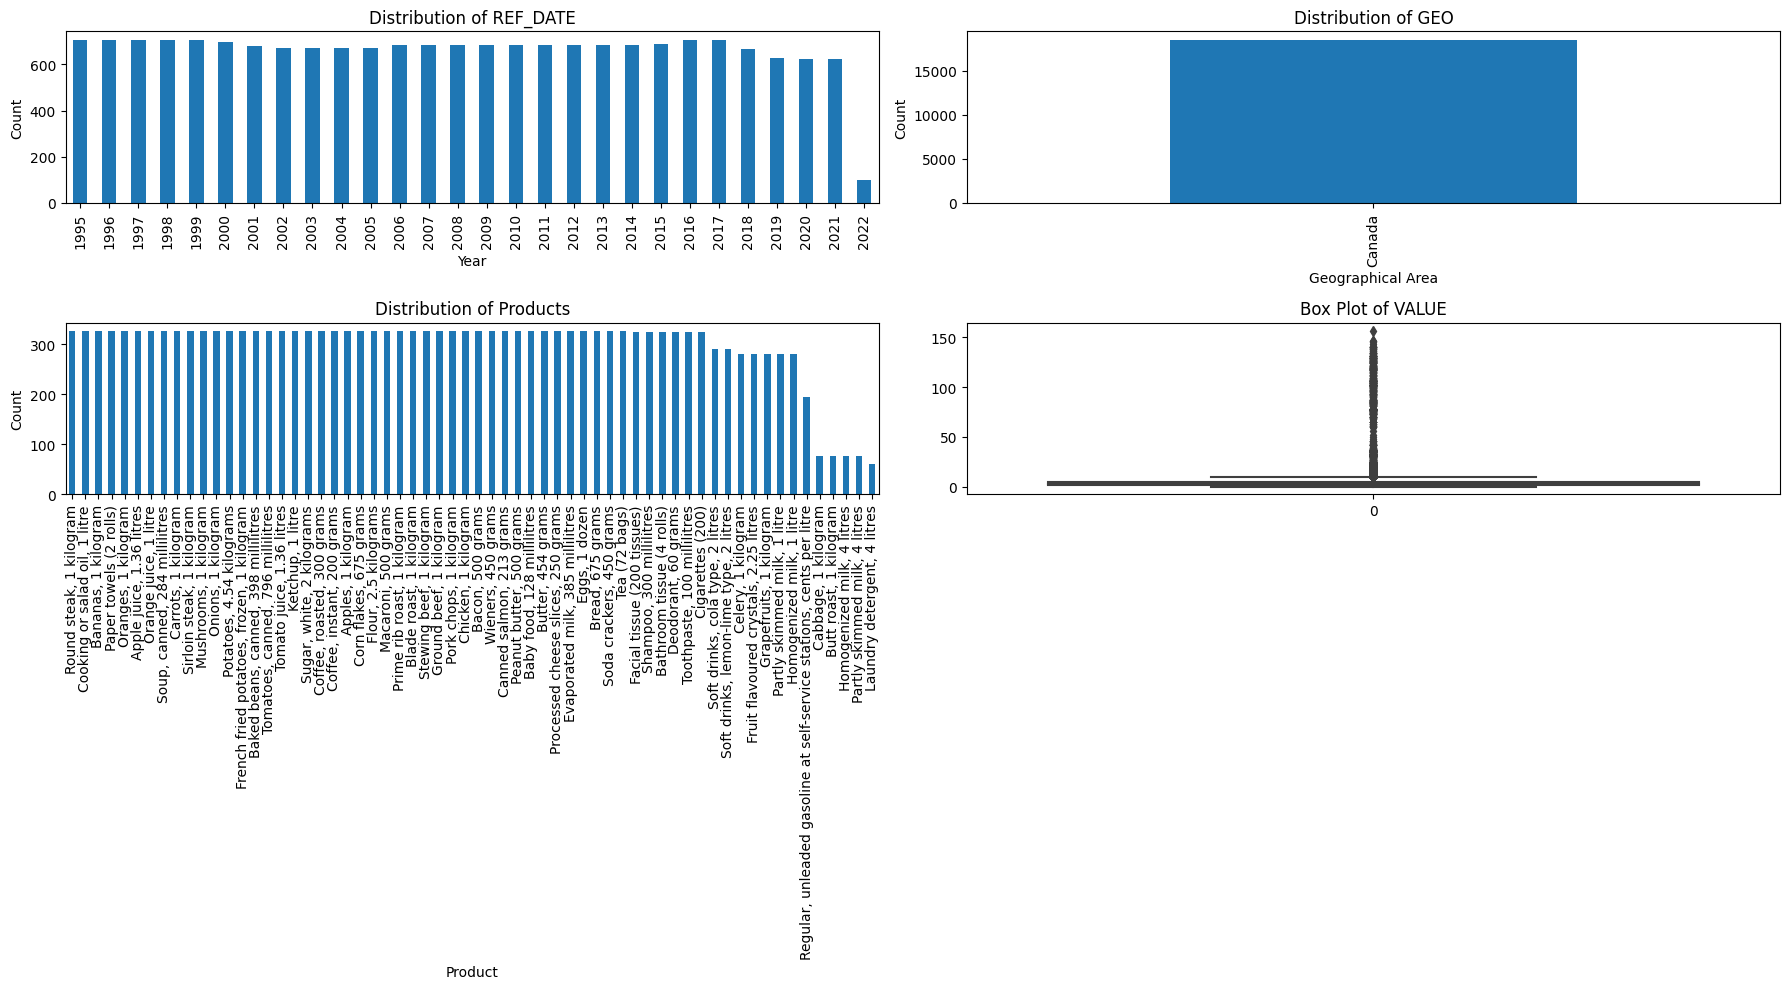

(count    18510.000000
 mean         6.582485
 std         15.717219
 min          0.000000
 25%          1.750000
 50%          2.850000
 75%          4.750000
 max        156.800000
 Name: VALUE, dtype: float64,
 1995    708
 1996    708
 1997    708
 1998    708
 1999    708
 2000    696
 2001    682
 2002    672
 2003    672
 2004    672
 2005    672
 2006    684
 2007    684
 2008    684
 2009    684
 2010    684
 2011    684
 2012    684
 2013    684
 2014    684
 2015    690
 2016    708
 2017    708
 2018    668
 2019    628
 2020    624
 2021    624
 2022     98
 Name: REF_DATE, dtype: int64,
 Canada    18510
 Name: GEO, dtype: int64,
 Round steak, 1 kilogram          326
 Cooking or salad oil, 1 litre    326
 Bananas, 1 kilogram              326
 Paper towels (2 rolls)           326
 Oranges, 1 kilogram              326
                                 ... 
 Cabbage, 1 kilogram               77
 Butt roast, 1 kilogram            77
 Homogenized milk, 4 litres        77
 Partl

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert REF_DATE to datetime
data['REF_DATE'] = pd.to_datetime(data['REF_DATE'])

# Analysis of REF_DATE
date_distribution = data['REF_DATE'].dt.year.value_counts().sort_index()

# Analysis of GEO
geo_distribution = data['GEO'].value_counts()

# Analysis of Products
product_distribution = data['Products'].value_counts()

# Analysis of VALUE
value_description = data['VALUE'].describe()

# Plotting the distributions
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
date_distribution.plot(kind='bar')
plt.title('Distribution of REF_DATE')
plt.xlabel('Year')
plt.ylabel('Count')

plt.subplot(2, 2, 2)
geo_distribution.plot(kind='bar')
plt.title('Distribution of GEO')
plt.xlabel('Geographical Area')
plt.ylabel('Count')

plt.subplot(2, 2, 3)
product_distribution.plot(kind='bar')
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=90)

plt.subplot(2, 2, 4)
sns.boxplot(data['VALUE'])
plt.title('Box Plot of VALUE')

plt.tight_layout()
plt.show()

value_description, date_distribution, geo_distribution, product_distribution



In [4]:
# Assessing missing values in detail
missing_values = data.isnull().sum()
missing_values_percentage = (missing_values / len(data)) * 100

missing_values_details = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_values_percentage
})

missing_values_details

# Removing columns with a high percentage of missing values
data_cleaned = data.drop(columns=['STATUS', 'SYMBOL', 'TERMINATED'])

# Checking the dataset after removal
data_cleaned_columns = data_cleaned.columns

data_cleaned_columns



Index(['REF_DATE', 'GEO', 'DGUID', 'Products', 'UOM', 'UOM_ID',
       'SCALAR_FACTOR', 'SCALAR_ID', 'VECTOR', 'COORDINATE', 'VALUE',
       'DECIMALS'],
      dtype='object')

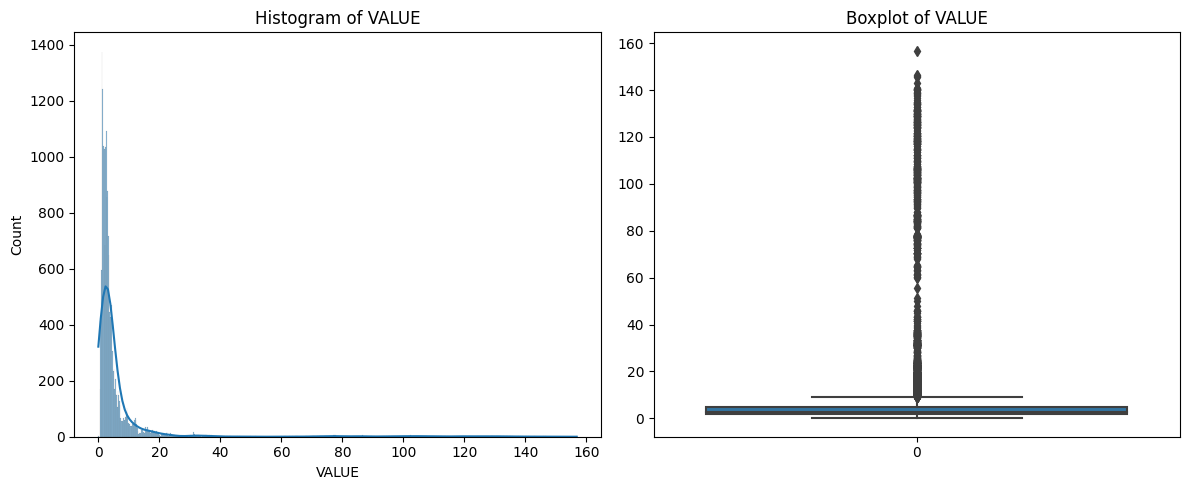

In [5]:
# Analyzing the distribution of the 'VALUE' column
plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data_cleaned['VALUE'], kde=True)
plt.title('Histogram of VALUE')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(data_cleaned['VALUE'])
plt.title('Boxplot of VALUE')

plt.tight_layout()
plt.show()


In [6]:
# Calculating IQR for 'VALUE'
Q1 = data_cleaned['VALUE'].quantile(0.25)
Q3 = data_cleaned['VALUE'].quantile(0.75)
IQR = Q3 - Q1

# Defining the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = data_cleaned[(data_cleaned['VALUE'] < lower_bound) | (data_cleaned['VALUE'] > upper_bound)]

# Number of outliers
num_outliers = outliers.shape[0]
percentage_outliers = (num_outliers / data_cleaned.shape[0]) * 100

num_outliers, percentage_outliers



(2245, 12.128579146407347)

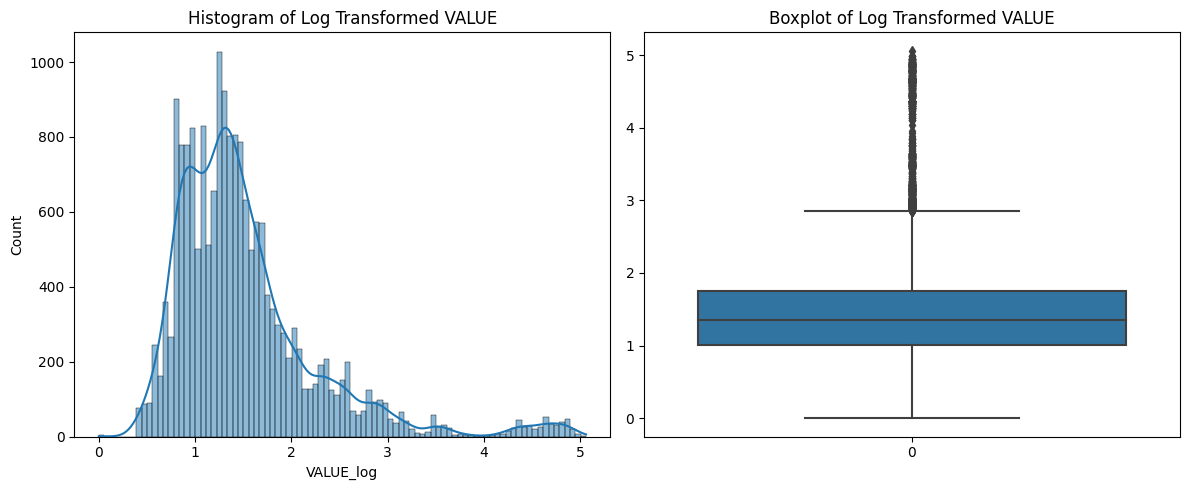

In [7]:
import numpy as np

# Adding a small constant (e.g., 1) to ensure all values are positive
data_transformed = data_cleaned.copy()
data_transformed['VALUE'] = data_transformed['VALUE'] + 1

# Applying the log transformation
data_transformed['VALUE_log'] = np.log(data_transformed['VALUE'])

# Visualizing the transformed data
plt.figure(figsize=(12, 5))

# Histogram of the transformed 'VALUE'
plt.subplot(1, 2, 1)
sns.histplot(data_transformed['VALUE_log'], kde=True)
plt.title('Histogram of Log Transformed VALUE')

# Boxplot of the transformed 'VALUE'
plt.subplot(1, 2, 2)
sns.boxplot(data_transformed['VALUE_log'])
plt.title('Boxplot of Log Transformed VALUE')

plt.tight_layout()
plt.show()



In [8]:
# Extracting year and month from REF_DATE
data_transformed['Year'] = data_transformed['REF_DATE'].dt.year
data_transformed['Month'] = data_transformed['REF_DATE'].dt.month

# Checking the first few rows to confirm the new features
data_transformed[['REF_DATE', 'Year', 'Month']].head()



,REF_DATE,Year,Month
0,1995-01-01,1995,1
1,1995-01-01,1995,1
2,1995-01-01,1995,1
3,1995-01-01,1995,1
4,1995-01-01,1995,1


In [9]:
# Applying one-hot encoding to the 'Products' column
products_encoded = pd.get_dummies(data_transformed['Products'], prefix='Product')

# Combining the encoded columns with the original dataset
data_encoded = pd.concat([data_transformed, products_encoded], axis=1)

# Displaying the first few rows of the new dataset
data_encoded.head()



,REF_DATE,GEO,DGUID,Products,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,...,"Product_Soft drinks, cola type, 2 litres","Product_Soft drinks, lemon-lime type, 2 litres","Product_Soup, canned, 284 millilitres","Product_Stewing beef, 1 kilogram","Product_Sugar, white, 2 kilograms",Product_Tea (72 bags),"Product_Tomato juice, 1.36 litres","Product_Tomatoes, canned, 796 millilitres","Product_Toothpaste, 100 millilitres","Product_Wieners, 450 grams"
0,1995-01-01,Canada,2016A000011124,"Round steak, 1 kilogram",Dollars,81,units,0,v735165,1.1,...,0,0,0,0,0,0,0,0,0,0
1,1995-01-01,Canada,2016A000011124,"Sirloin steak, 1 kilogram",Dollars,81,units,0,v735176,1.2,...,0,0,0,0,0,0,0,0,0,0
2,1995-01-01,Canada,2016A000011124,"Prime rib roast, 1 kilogram",Dollars,81,units,0,v735187,1.3,...,0,0,0,0,0,0,0,0,0,0
3,1995-01-01,Canada,2016A000011124,"Blade roast, 1 kilogram",Dollars,81,units,0,v735198,1.4,...,0,0,0,0,0,0,0,0,0,0
4,1995-01-01,Canada,2016A000011124,"Stewing beef, 1 kilogram",Dollars,81,units,0,v735209,1.5,...,0,0,0,1,0,0,0,0,0,0


In [10]:
# Redefining the selected products
selected_products = ['Product_Round steak, 1 kilogram',
                     'Product_Sirloin steak, 1 kilogram',
                     'Product_Bananas, 1 kilogram']

# Creating interaction features again
for product in selected_products:
    product_col = data_encoded[product]  # Get the column for the product
    data_encoded[f'{product}_Year'] = data_encoded['Year'] * product_col
    data_encoded[f'{product}_Month'] = data_encoded['Month'] * product_col

# Displaying the new interaction features
interaction_features = data_encoded[[f'{product}_Year' for product in selected_products] +
                                    [f'{product}_Month' for product in selected_products]].head()

interaction_features



,"Product_Round steak, 1 kilogram_Year","Product_Sirloin steak, 1 kilogram_Year","Product_Bananas, 1 kilogram_Year","Product_Round steak, 1 kilogram_Month","Product_Sirloin steak, 1 kilogram_Month","Product_Bananas, 1 kilogram_Month"
0,1995,0,0,1,0,0
1,0,1995,0,0,1,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [11]:
# Creating interaction features between VALUE_log and time-related features
data_encoded['VALUE_log_Year'] = data_encoded['VALUE_log'] * data_encoded['Year']
data_encoded['VALUE_log_Month'] = data_encoded['VALUE_log'] * data_encoded['Month']

# Displaying the new interaction features
value_time_interaction = data_encoded[['VALUE_log_Year', 'VALUE_log_Month']].head()
value_time_interaction



,VALUE_log_Year,VALUE_log_Month
0,4814.397068,2.413232
1,4998.524244,2.505526
2,5129.313270,2.571084
3,4205.033099,2.107786
4,4178.188658,2.094330


In [12]:
# Calculating the correlation matrix for the numeric variables
correlation_matrix = data_encoded.select_dtypes(include=['float64', 'int64']).corr()

# Displaying the correlation matrix
correlation_matrix



,UOM_ID,SCALAR_ID,COORDINATE,VALUE,DECIMALS,VALUE_log,Year,Month,"Product_Round steak, 1 kilogram_Year","Product_Round steak, 1 kilogram_Month","Product_Sirloin steak, 1 kilogram_Year","Product_Sirloin steak, 1 kilogram_Month","Product_Bananas, 1 kilogram_Year","Product_Bananas, 1 kilogram_Month",VALUE_log_Year,VALUE_log_Month
UOM_ID,1.000000,NaN,-0.138910,-0.699982,1.000000,-0.433588,-0.074751,0.000567,0.013780,0.012124,0.013780,0.012124,0.013780,0.012124,-0.434035,-0.276588
SCALAR_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COORDINATE,-0.138910,NaN,1.000000,0.203236,-0.138910,0.179464,0.015154,0.000484,-0.206627,-0.181800,-0.129158,-0.113639,-0.090423,-0.079558,0.179220,0.115048
VALUE,-0.699982,NaN,0.203236,1.000000,-0.699982,0.804592,0.152368,0.001906,0.058903,0.051711,0.086408,0.076211,-0.043886,-0.038664,0.805069,0.518673
DECIMALS,1.000000,NaN,-0.138910,-0.699982,1.000000,-0.433588,-0.074751,0.000567,0.013780,0.012124,0.013780,0.012124,0.013780,0.012124,-0.434035,-0.276588
VALUE_log,-0.433588,NaN,0.179464,0.804592,-0.433588,1.000000,0.249884,0.002208,0.197950,0.173978,0.232022,0.204335,-0.111972,-0.098973,0.999966,0.643899
Year,-0.074751,NaN,0.015154,0.152368,-0.074751,0.249884,1.000000,-0.015049,0.003514,0.001636,0.003514,0.001636,0.003514,0.001636,0.256991,0.149195
Month,0.000567,NaN,0.000484,0.001906,0.000567,0.002208,-0.015049,1.000000,0.000061,0.063127,0.000061,0.063127,0.000061,0.063127,0.002079,0.685292
"Product_Round steak, 1 kilogram_Year",0.013780,NaN,-0.206627,0.058903,0.013780,0.197950,0.003514,0.000061,1.000000,0.879800,-0.017928,-0.015773,-0.017928,-0.015773,0.197436,0.126699
"Product_Round steak, 1 kilogram_Month",0.012124,NaN,-0.181800,0.051711,0.012124,0.173978,0.001636,0.063127,0.879800,1.000000,-0.015773,-0.013878,-0.015773,-0.013878,0.173506,0.186571


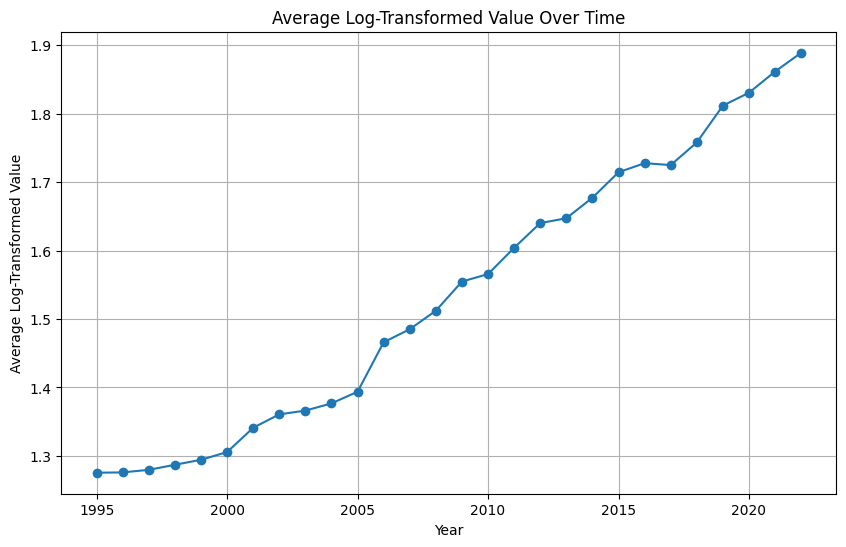

In [13]:
# Calculating the average VALUE_log for each year
average_value_per_year = data_encoded.groupby('Year')['VALUE_log'].mean()

# Plotting the average VALUE_log over the years
plt.figure(figsize=(10, 6))
average_value_per_year.plot(kind='line', marker='o')
plt.title('Average Log-Transformed Value Over Time')
plt.xlabel('Year')
plt.ylabel('Average Log-Transformed Value')
plt.grid(True)
plt.show()


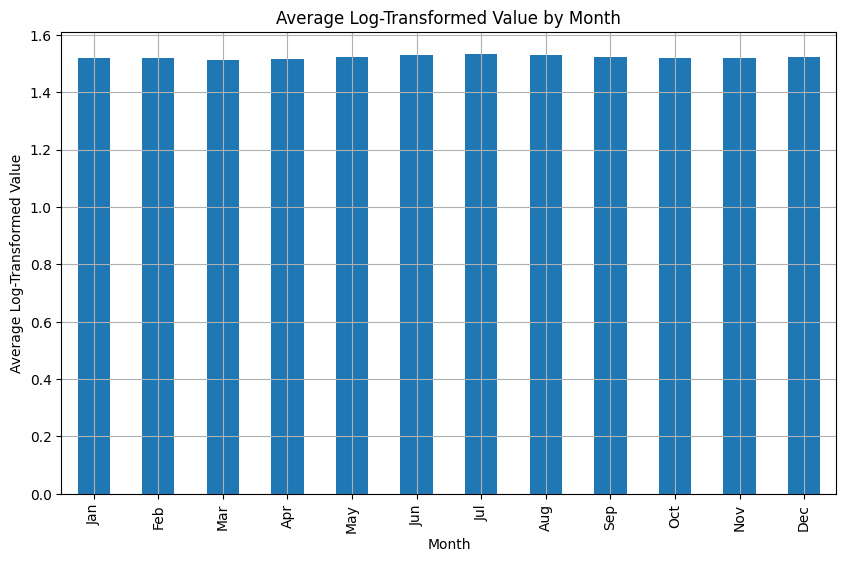

In [14]:
# Calculating the average VALUE_log for each month
average_value_per_month = data_encoded.groupby('Month')['VALUE_log'].mean()

# Plotting the average VALUE_log across months
plt.figure(figsize=(10, 6))
average_value_per_month.plot(kind='bar')
plt.title('Average Log-Transformed Value by Month')
plt.xlabel('Month')
plt.ylabel('Average Log-Transformed Value')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()



In [15]:
# Filtering the dataset for "Round steak, 1 kilogram"
product_name = 'Round steak, 1 kilogram'
product_data = data_encoded[data_encoded['Products'] == product_name]

# Selecting relevant columns for the model
# Including time features, VALUE_log, and any other relevant columns
model_data = product_data[['REF_DATE', 'VALUE_log', 'Year', 'Month'] +
                          [col for col in product_data.columns if 'Round steak' in col]]

# Checking the first few rows of the data prepared for modeling
model_data.head()



,REF_DATE,VALUE_log,Year,Month,"Product_Round steak, 1 kilogram","Product_Round steak, 1 kilogram_Year","Product_Round steak, 1 kilogram_Month"
0,1995-01-01,2.413232,1995,1,1,1995,1
59,1995-02-01,2.423917,1995,2,1,1995,2
118,1995-03-01,2.408745,1995,3,1,1995,3
177,1995-04-01,2.431857,1995,4,1,1995,4
236,1995-05-01,2.397895,1995,5,1,1995,5


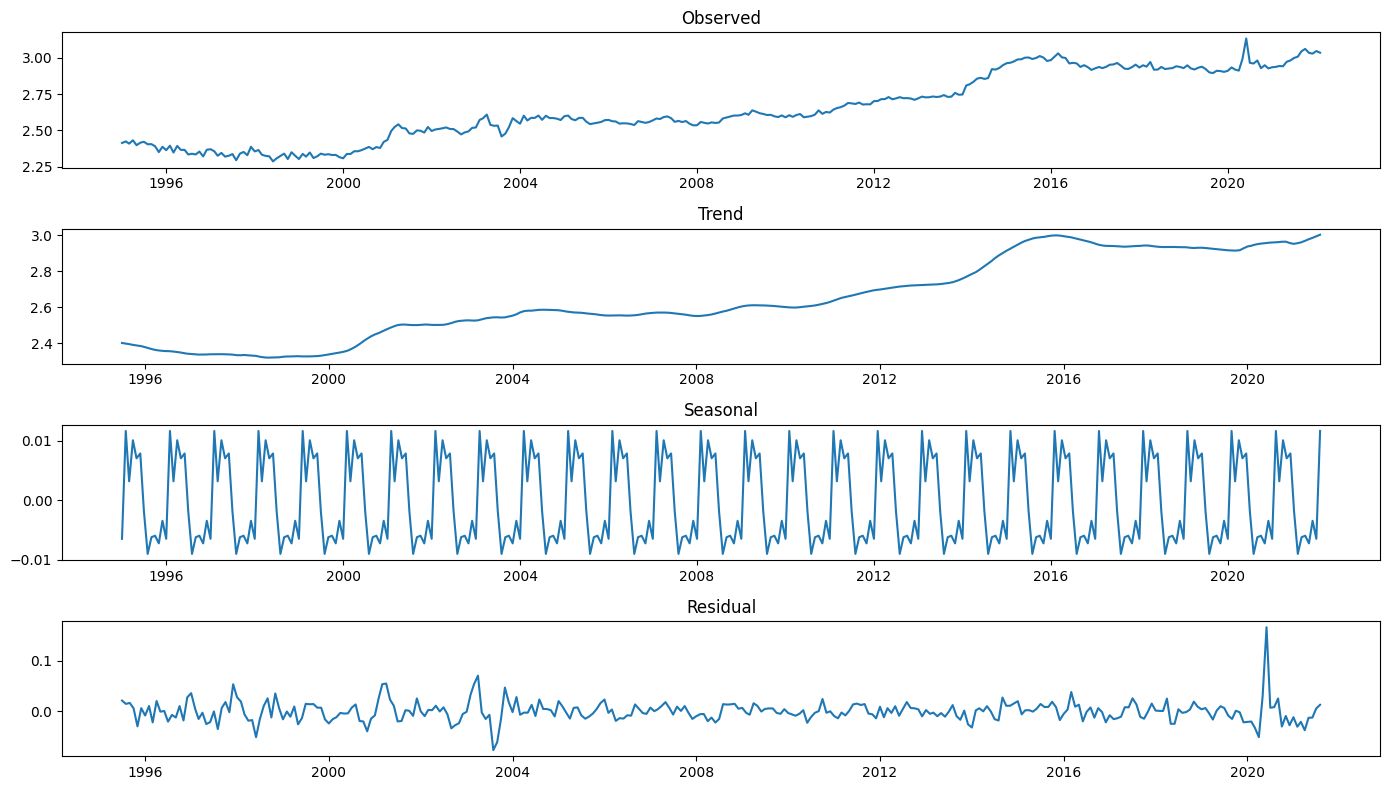

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Setting the date as the index for time series analysis
model_data_ts = model_data.set_index('REF_DATE')

# Time series decomposition
decomposition = seasonal_decompose(model_data_ts['VALUE_log'], model='additive', period=12)

# Plotting the decomposition
plt.figure(figsize=(14, 8))
plt.subplot(411)
plt.plot(decomposition.observed)
plt.title('Observed')
plt.subplot(412)
plt.plot(decomposition.trend)
plt.title('Trend')
plt.subplot(413)
plt.plot(decomposition.seasonal)
plt.title('Seasonal')
plt.subplot(414)
plt.plot(decomposition.resid)
plt.title('Residual')
plt.tight_layout()
plt.show()



In [17]:
from statsmodels.tsa.stattools import adfuller

# Augmented Dickey-Fuller test
adf_test = adfuller(model_data_ts['VALUE_log'])

# Extracting the p-value and the test statistic
adf_test_statistic = adf_test[0]
adf_test_p_value = adf_test[1]

adf_test_statistic, adf_test_p_value



(0.19965535641431004, 0.9722422573004879)

In [18]:
# Applying first-order differencing
model_data_ts_diff = model_data_ts['VALUE_log'].diff().dropna()

# Re-performing the Augmented Dickey-Fuller test on the differenced data
adf_test_diff = adfuller(model_data_ts_diff)

# Extracting the p-value and the test statistic for the differenced data
adf_test_statistic_diff = adf_test_diff[0]
adf_test_p_value_diff = adf_test_diff[1]

adf_test_statistic_diff, adf_test_p_value_diff



(-8.923153859409561, 1.0280584474301264e-14)

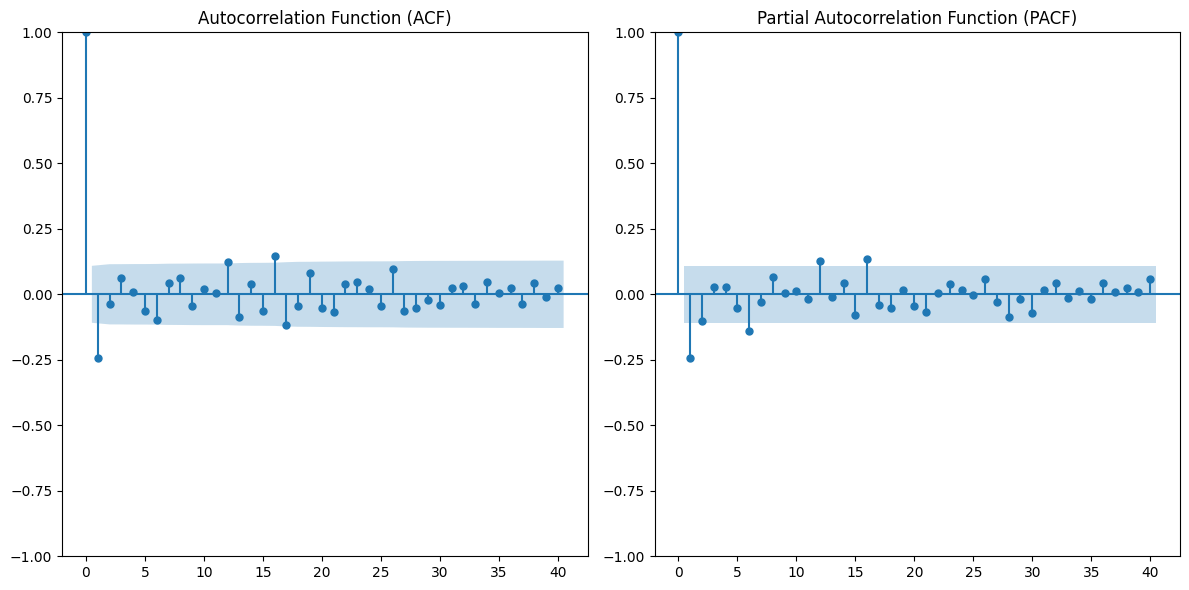

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF and PACF
plt.figure(figsize=(12, 6))

plt.subplot(121)
plot_acf(model_data_ts_diff, ax=plt.gca(), lags=40)
plt.title('Autocorrelation Function (ACF)')

plt.subplot(122)
plot_pacf(model_data_ts_diff, ax=plt.gca(), lags=40)
plt.title('Partial Autocorrelation Function (PACF)')

plt.tight_layout()
plt.show()

